<a href="https://colab.research.google.com/github/nHuloux/DeepLearning-Aflokkat/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification multi-classe
Nous allons réaliser une application web qui permet de reconnaitre des chiffres écrits à la main dans un canvas.

Pendant cette activité guidée vous allez être amené à importer le dataset MNIST, le pré-traiter, l'utiliser pour entraîner un réseau de neurone et enfin d'insérer ce réseau dans l'application en Django.

Importer les librairies nécessaires pour traiter des données, pour construire et évaluer des réseaux de neurones

In [2]:
import sklearn

Importer les données du MNIST à partir de l'API openML et le mettre dans une variable qu'on appellera digits.


In [2]:
# from sklearn.datasets import fetch_openml
# digits = fetch_openml('mnist_784')

Les celules avec pickel sevent a créer un fichier contenant la varriables digits
La deuxieme celule sert a ouvrir ce fichier et placer sont contenue dans la var digits

In [3]:
import pickle

# with open("digits.pkl", "wb") as f:
#    pickle.dump(digits, f)
#    f.close()

In [4]:

with open("digits.pkl", "rb") as f:
   digits = pickle.load(f)
   f.close()

Qu'y a-t-il dans :


```
digits.target
digits.data
```



**Réponse :**

In [5]:
# target : Un tableau contenant les étiquettes de chaque image, c'est-à-dire le chiffre que chaque image représente (de 0 à 9).

digits.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
# data : Un tableau de forme (70000 (ligne), 784 (colonne)) contenant les images de chiffres aplatis en vecteurs.

digits.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Combien de pixels contient une image ? Quel sont les dimensions de l'image originale ? Quel traitement a été réalisé sur ces images pour avoir `digits.data` ?


**Réponse :**

784 pixel, 28 x 28 pixels


Recréer une image de 28x28. On pourra utiliser les fonctions `iloc`, et `reshape` de pandas

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

mnistDf = pd.DataFrame(digits.data)

# Sélectionnez une image (par exemple, la première image). une image = une ligne
image_row = mnistDf.iloc[155]

# Redimensionnez la ligne du DataFrame pour obtenir une matrice 28x28.
image_matrix = image_row.values.reshape(28, 28)

# OU

im = digits.data.iloc[150].to_numpy().reshape(28, 28)


Afficher une image avec la librairie matplotlib, à quel label est-elle associée ?



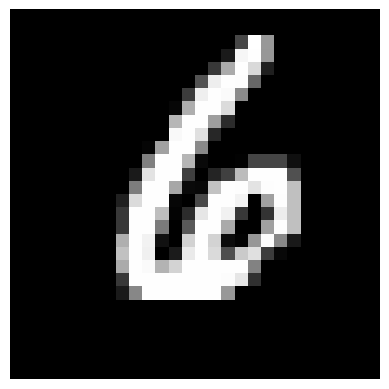

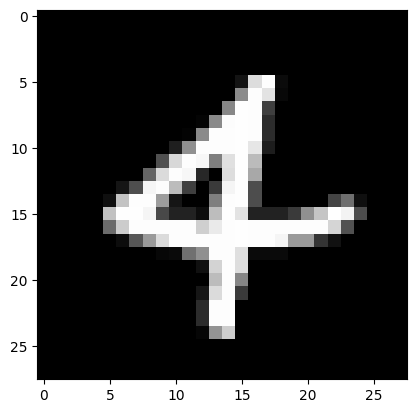

In [9]:
# Affichez l'image.

plt.imshow(image_matrix, cmap='gray')
plt.axis('off')  # Désactivez les axes pour une meilleure visibilité
plt.show()

# ou

plt.imshow(im, cmap='gray')

Est-ce qu'on va utiliser les images (28x28) ou leur version stocké dans le digits.data (786) ?



_À compléter_

**Construire le dataset en créant le vecteur d'entrée X, et le vecteur des sorties y en se basant sur notre dataset importé. Pour une meilleure utilisation du dataset, il est de bon ton de normaliser ces vecteurs.**

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

X = digits.data
y = digits.target

# Appliquons le normaliseur aux caractéristiques d'entrée
X_normalized = X / 255

# X_normalized = preprocessing.minmax_scale(X, feature_range=(0, 1))

# Créons un normaliseur qui va échelonner les données dans l'intervalle [0, 1]
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)


**Séparer ce dataset en un set d'entrainement, un set de validation et un set de test, en prenant 20% des valeurs pour le test et 10% pour la validation.**

In [11]:
from sklearn.model_selection import train_test_split

# Supposons que `X_normalized` et `y` sont déjà définis.

# Étape 1: Séparer les données en 70% pour l'entraînement et 30% pour le reste (temporairement pour validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, train_size=0.7, random_state=42)

# Étape 2: Séparer les 30% restants en 20% pour le test et 10% pour la validation.
# Pour obtenir cela, vous devez diviser les 30% restants en deux tiers pour le test (ce qui équivaut à 20% du total)
# et un tiers pour la validation (ce qui équivaut à 10% du total).
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)

# Vérification des tailles des ensembles
print(f'Taille de l\'ensemble d\'entraînement : {len(X_train)}')
print(f'Taille de l\'ensemble de validation : {len(X_val)}')
print(f'Taille de l\'ensemble de test : {len(X_test)}')


Taille de l'ensemble d'entraînement : 49000
Taille de l'ensemble de validation : 7000
Taille de l'ensemble de test : 14000


# Construction du modèle




## Machine learning


Quel est le type de problème que nous essayons de résoudre ici ?

_À compléter_

La plupart des modèles de machine learning ne supportent pas la classification multi-classe nativement. Certaines stratégies doivent être utilisées. Ces stratégies consistent à réaliser un classifieur binaire pour déterminer si une donnée appartient à une des classes, ou non. Dans notre cas, nous pourrions construire 10 classifieurs binaires qui viennent prédire si l'image utilisée correspond à un digit ou non. La plupart du temps ces stratégies sont directement implémentées dans les modèles de machine learning et dans leur algorithmes d'apprentissage.

En utilisant la roadmap scikit-learn choisir le modèle de machine learning adapté et l'importer. Créer un classifieur en forçant la stratégie de décision pour la multi-classe en "one versus one" :
`decision_function_shape='ovo'`

In [12]:
from sklearn.svm import SVC

# Créer un classifieur SVM avec une décision one-vs-one
modelSvc = SVC(decision_function_shape='ovo')

**L'entraîner sur nos données d'entraînement.**

In [13]:
modelSvc.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

**Combien de temps l'execution as prise ? Quelle stratégie pourrait-on mettre en place pour gagner du temps sur l'execution ?**

2m13s réduire le jeu de donnée, comprésser etc

**L'évaluer sur nos données de validation.**

In [14]:
# modelSvc.score(X_val, y_val)

0.9758571428571429

**Autre Model**

In [14]:
# from sklearn.svm import LinearSVC

# linearSvcModel = LinearSVC(multi_class='ovr')

# linearSvcModel.fit(X_train, y_train)

# linearSvcModel.score(X_val, y_val)

**Bien que ce score soit excellent, il est intéressant de chercher s'il n'existe pas un autre modèle plus performant. Réaliser un grid search en applicant la stratégie imaginée pour gagner du temps sur l'apprentissage. Limitons tout de même les paramètres de grid search.**

**Créer d'abord le dataset dégradé et amputé, à l'aide de scikit-image.**

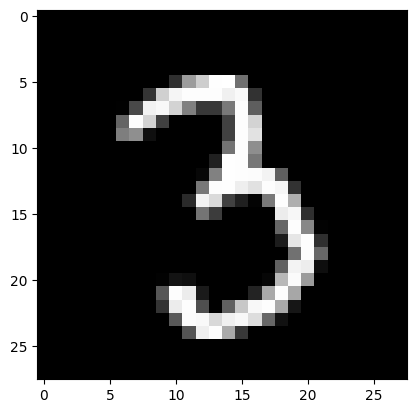

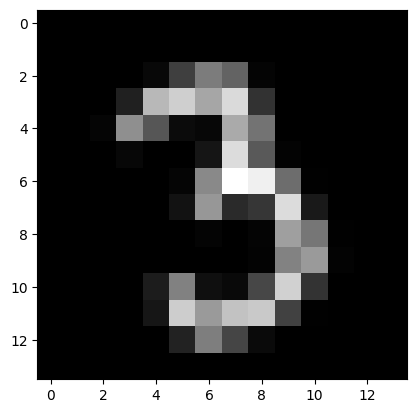

In [15]:
from skimage.transform import rescale
import numpy as np

# Pour modifier une img et l'afficher 
monImg = X_train.loc[30000].to_numpy().reshape((28,28))
plt.imshow(monImg, cmap="gray")
plt.figure()
plt.imshow(rescale(monImg, 0.5), cmap="gray")

In [16]:
# Redimensionne toute les images 

# def rescale_image(flat_image):
#    image = flat_image.to_numpy().reshape((28,28))
#    return rescale(image, 0.5).reshape(14*14)

# # Apllique la fonction a toute les img
# X_rescaled = X.apply(rescale_image, axis=1)

from skimage.transform import rescale
import numpy as np

# Définir la fonction de rescaling
def rescale_image(image, scale=0.5):
    # Assurez-vous que l'image est une matrice 28x28
    image = image.reshape((28, 28))
    # Appliquer la fonction de rescale
    rescaled_image = rescale(image, scale, anti_aliasing=True)
    # Aplatir l'image rescaled pour la rendre de nouveau sous forme de vecteur
    flat_rescaled_image = rescaled_image.flatten()
    return flat_rescaled_image

# Assurez-vous d'abord que X_train, X_val et X_test sont des arrays NumPy
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Appliquer la fonction de rescaling
X_train_rescaled = np.array([rescale_image(x) for x in X_train])
X_val_rescaled = np.array([rescale_image(x) for x in X_val])
X_test_rescaled = np.array([rescale_image(x) for x in X_test])


**Test de plusieurs modèles choisi aléatoirement**

In [17]:
# modelSvc.fit(X_train_rescaled, y_train)

# modelSvc.score(X_val_rescaled, y_val)

SVC(decision_function_shape='ovo')

In [19]:
# from sklearn.svm import LinearSVC

# linearSvcModel = LinearSVC(multi_class='ovr')

# linearSvcModel.fit(X_train_rescaled, y_train)

# linearSvcModel.score(X_val_rescaled, y_val)

/Users/vincentchabran/Documents/gitHub/masterAflokkat/machineLearning/cours3-021023/.venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/vincentchabran/Documents/gitHub/masterAflokkat/machineLearning/cours3-021023/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9137142857142857

In [20]:
# from sklearn.svm import NuSVC

# nu_svc = NuSVC(nu=0.5, kernel='rbf', gamma='scale', random_state=42)

# # Entraîner le classifieur
# nu_svc.fit(X_train_rescaled, y_train)
 
# nu_svc.score(X_val_rescaled, y_val)

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Créer une instance du MLPClassifier
# # Vous pouvez jouer avec différents paramètres comme la taille des couches cachées, la fonction d'activation, le solver, etc.
# mlp_clf = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, alpha=1e-4,
#                     solver='sgd', verbose=10, random_state=1,
#                     learning_rate_init=.1)

# # Entraîner le modèle avec le set d'entraînement
# mlp_clf.fit(X_train_rescaled, y_train)
# mlp_clf.score(X_val_rescaled, y_val)


Iteration 1, loss = 0.46360820
Iteration 2, loss = 0.23475167
Iteration 3, loss = 0.18240726
Iteration 4, loss = 0.15395409
Iteration 5, loss = 0.13356346
Iteration 6, loss = 0.11921981
Iteration 7, loss = 0.10955236
Iteration 8, loss = 0.10237296
Iteration 9, loss = 0.09515661
Iteration 10, loss = 0.09002951
Iteration 11, loss = 0.08458606
Iteration 12, loss = 0.08106280
Iteration 13, loss = 0.07657453
Iteration 14, loss = 0.07320152
Iteration 15, loss = 0.07002313
Iteration 16, loss = 0.06683852
Iteration 17, loss = 0.06506097
Iteration 18, loss = 0.06227936
Iteration 19, loss = 0.05990980
Iteration 20, loss = 0.05871992
Iteration 21, loss = 0.05663885
Iteration 22, loss = 0.05465062
Iteration 23, loss = 0.05313715
Iteration 24, loss = 0.05142955
Iteration 25, loss = 0.04982321
Iteration 26, loss = 0.04862565
Iteration 27, loss = 0.04733891
Iteration 28, loss = 0.04733464
Iteration 29, loss = 0.04472561
Iteration 30, loss = 0.04397915
Iteration 31, loss = 0.04280968
Iteration 32, los

0.971

In [1]:
# from sklearn.neighbors import KNeighborsClassifier

# # Créer une instance du KNeighborsClassifier
# # Vous pouvez spécifier différents paramètres tels que 'n_neighbors' qui détermine le nombre de voisins à utiliser
# knn_clf = KNeighborsClassifier(n_neighbors=3)

# # Entraîner le modèle avec le set d'entraînement
# knn_clf.fit(X_train_rescaled, y_train)
# knn_clf.score(X_val_rescaled, y_val)

NameError: name 'X_train_rescaled' is not defined

L'utiliser dans le grid search.

Une fois fait sur nos données dégradées, nous pourrions utiliser ces paramètres d'apprentissage sur les données non-dégradées. Ou alors, nous pourrions très bien utiliser ce modèle, en dégradant systèmatiquement les données d'entrées. Testons celà sur les X_validation afin de voir si ça marcherait bien.

In [16]:
# Créer le fichier contenant le modele 
import pickle

with open("mon modele.pkl", "wb") as f:
   pickle.dump(modelSvc, f)
   f.close()


In [17]:
modelSvc.predict(X_test)

array(['4', '4', '7', ..., '0', '4', '3'], dtype=object)

# Intégration dans une application web.

1. Télécharger le .zip
2. Lire le readme
3. Tester l'application
4. Explorer les fichiers de l'application Django.

Quel est le format de l'image récupérée ?

***Réponse :***

Dans le dossier joint, un exemple de la sortie du canva est fourni en csv. Importer ce cvs dans un dataframe.

À partir de la [documentation](https://developer.mozilla.org/fr/docs/Web/API/CanvasRenderingContext2D/getImageData) du canva, de la taille de l'image renseignée dans le code Django, reconstruire une matrice correspondant à l'image, et l'afficher.

Sur quelle forme de donnée notre modèle précédent s'est entraîné ?

***Réponse :***

En utilisant une modification morphologique sur notre image récupéré par le Canva, recréer une image de (28,28). On pourra utiliser openCV ou scikit-image, on conseille d'enregistrer l'image de (400,400). D'importer cette image, d'utiliser une dilatation ou une erosion, puis de la redimensionner.

Si vous pouvez lire le chiffre, votre modèle devrait le pouvoir aussi. Testez de faire lire ce chiffre à votre modèle de ML puis de DL.

Si votre modèle prédit correctement, vous pouvez exporter votre modèle. On pourra s'intéresser à regarder la différence entre l'export sous scikit learn ou sous tensorflow. Choisissez celui qui vous semble le plus pertinent, puis importez votre modèle dans l'application Django, et finalement testez votre modèle ;)